In [1]:
import pandas as pd

df_aluguel = pd.read_csv('../csv/aluguel.csv', sep=';')

df_aluguel.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


## Há dados faltantes no dataset (isnull, notnull)?

In [2]:
df_aluguel.isna().sum()

Tipo              0
Bairro            0
Quartos           0
Vagas             0
Suites            0
Area              0
Valor            17
Condominio     4093
IPTU          10237
dtype: int64

## Dropar dados faltantes por colunas (dropna() valor)

In [3]:
df_aluguel2 = df_aluguel.dropna(how='all', axis=0)

In [4]:
print(df_aluguel2.shape, df_aluguel.shape)

(32960, 9) (32960, 9)


## Preencher dados faltantes por colunas (fillna() condominio, iptu)

In [5]:
df_aluguel.IPTU.fillna(0, inplace=True)
df_aluguel.Condominio.fillna(0, inplace=True)
# df_aluguel.IPTU

## Armanzenar novo CSV tratado

In [6]:
df_aluguel.to_csv('aluguel_pre_processado.csv', index=False)

## Criar novas variáveis: valor total e valor por m2

In [7]:
df_aluguel['ValorTotal'] = df_aluguel['Valor'] + df_aluguel['Condominio'] + df_aluguel['IPTU']

In [8]:
df_aluguel['ValorM2'] = df_aluguel['ValorTotal'] / df_aluguel['Area']

In [9]:
df_aluguel.ValorM2 = df_aluguel.ValorM2.round(2)

In [10]:
df_aluguel

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,ValorTotal,ValorM2
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0,56.50
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0,70.00
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,10331.0,68.87
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1210.0,80.67
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0,21.46
...,...,...,...,...,...,...,...,...,...,...,...
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0,1175.0,43.52
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0,2640.0,33.85
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0,1946.0,40.54
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,0.0,3760.0,53.71


## Como excluir variáveis

In [11]:
del df_aluguel['ValorM2']

In [12]:
df_aluguel

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,ValorTotal
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,10331.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1210.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0
...,...,...,...,...,...,...,...,...,...,...
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0,1175.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0,2640.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0,1946.0
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,0.0,3760.0


## Agrupamento e agregações

In [13]:
df_aluguel.groupby("Tipo").Valor.max() # .groups

Tipo
Apartamento                      4500000.0
Box/Garagem                       100000.0
Casa                               60000.0
Casa Comercial                    100000.0
Casa de Condomínio                800000.0
Casa de Vila                       15000.0
Chácara                             4900.0
Conjunto Comercial/Sala          1279200.0
Flat                               16000.0
Galpão/Depósito/Armazém         15000000.0
Hotel                              38000.0
Indústria                         120000.0
Loft                                6000.0
Loja Shopping/ Ct Comercial       430000.0
Loja/Salão                        330000.0
Loteamento/Condomínio              40000.0
Pousada/Chalé                       1480.0
Prédio Inteiro                 120000000.0
Quitinete                           6500.0
Studio                              5000.0
Sítio                              20000.0
Terreno Padrão                    180000.0
Name: Valor, dtype: float64

## Criando faixas de valores (discretização) com pandas.cut() e value_counts()

In [14]:
pd.cut(df_aluguel.Valor, bins=3).value_counts()

(-119924.925, 40000050.0]    32942
(80000025.0, 120000000.0]        1
(40000050.0, 80000025.0]         0
Name: Valor, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x7f58b4f3a190>,
 'caps': [<matplotlib.lines.Line2D at 0x7f58b4f3a7f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f58b6f9ee80>],
 'medians': [<matplotlib.lines.Line2D at 0x7f58b4f3acd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f58b4f3afa0>],
 'means': []}

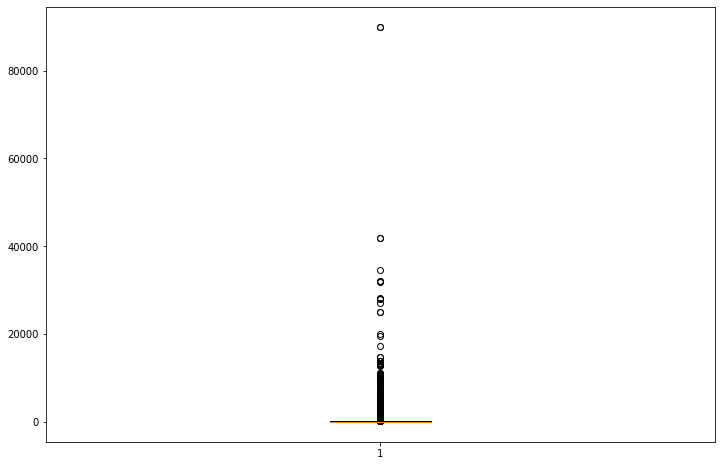

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))

plt.boxplot(df_aluguel.Area)

## Remoção de Outliers com filtro e seleção (ex.: Valor)

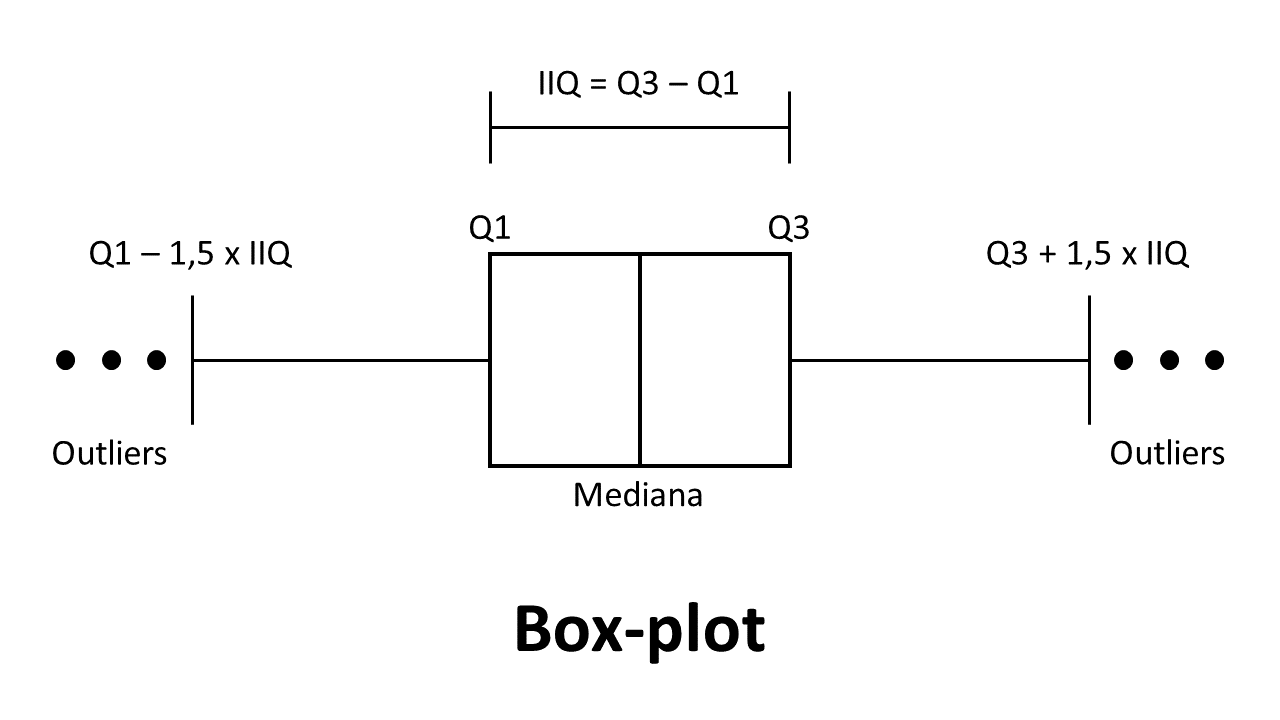

In [16]:
coluna = 'Valor'

Q1 = df_aluguel[coluna].quantile(.25)
Q3 = df_aluguel[coluna].quantile(.75)
# Q4 = df_aluguel[coluna].quantile(1)
# print(Q1, Q3, Q4)

IIQ = Q3 - Q1
print(IIQ, Q1, Q3)

limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

5000.0 1500.0 6500.0


In [17]:
selecao = (df_aluguel[coluna] >= limite_inferior) & (df_aluguel[coluna] <= limite_superior)

In [18]:
print(df_aluguel.shape, df_aluguel[selecao].shape)

(32960, 10) (29132, 10)


In [19]:
df_aluguel = df_aluguel[selecao]

In [20]:
df_aluguel

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,ValorTotal
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,10331.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1210.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0
...,...,...,...,...,...,...,...,...,...,...
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0,1175.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0,2640.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0,1946.0
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,0.0,3760.0


/tmp/ipykernel_5563/3350866412.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.boxplot(df_aluguel[selecao].Valor)


{'whiskers': [<matplotlib.lines.Line2D at 0x7f58b4c82610>,
 'caps': [<matplotlib.lines.Line2D at 0x7f58b4c82ac0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f58b4c82340>],
 'medians': [<matplotlib.lines.Line2D at 0x7f58b4c130a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f58b4c13370>],
 'means': []}

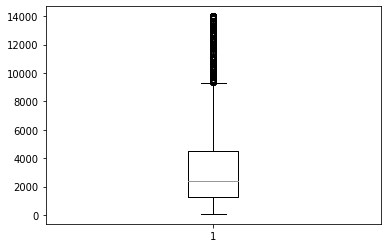

In [21]:
plt.boxplot(df_aluguel[selecao].Valor)

In [22]:
coluna = 'Area'

Q1 = df_aluguel[coluna].quantile(.25)
Q3 = df_aluguel[coluna].quantile(.75)
# Q4 = df_aluguel[coluna].quantile(1)
# print(Q1, Q3, Q4)

IIQ = Q3 - Q1
print(IIQ, Q1, Q3)

limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

80.0 50.0 130.0


In [23]:
limite_superior

250.0

In [24]:
selecao = (df_aluguel[coluna] >= limite_inferior) & (df_aluguel[coluna] <= limite_superior)

In [25]:
df_aluguel = df_aluguel[selecao]

In [26]:
df_aluguel

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,ValorTotal
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,10331.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1210.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0
...,...,...,...,...,...,...,...,...,...,...
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0,1175.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0,2640.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0,1946.0
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,0.0,3760.0


/tmp/ipykernel_5563/417924418.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.boxplot(df_aluguel[selecao].Condominio)


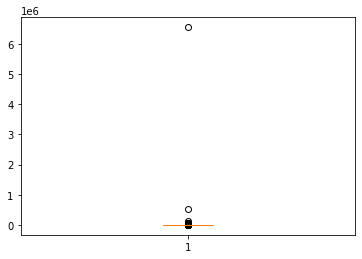

In [27]:
plt.boxplot(df_aluguel[selecao].Condominio)
plt.show()

In [28]:
df_aluguel.corr()

,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,ValorTotal
Quartos,1.000000,0.002403,0.467546,0.582212,0.319490,0.004860,0.022144,0.026822
Vagas,0.002403,1.000000,0.008372,0.012090,0.009043,0.000338,0.002263,0.001091
Suites,0.467546,0.008372,1.000000,0.436194,0.337038,0.008534,0.048310,0.033711
Area,0.582212,0.012090,0.436194,1.000000,0.695249,0.014671,0.089556,0.065805
Valor,0.319490,0.009043,0.337038,0.695249,1.000000,0.016607,0.092898,0.087260
Condominio,0.004860,0.000338,0.008534,0.014671,0.016607,1.000000,0.003487,0.994185
IPTU,0.022144,0.002263,0.048310,0.089556,0.092898,0.003487,1.000000,0.090857
ValorTotal,0.026822,0.001091,0.033711,0.065805,0.087260,0.994185,0.090857,1.000000


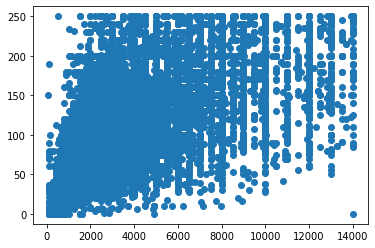

In [29]:
plt.scatter(x=df_aluguel['Valor'], y=df_aluguel['Area'])

In [30]:
# -1 a 1 (correlação de Pearson)

In [31]:
df_houses = pd.read_csv('../csv/houses.csv')

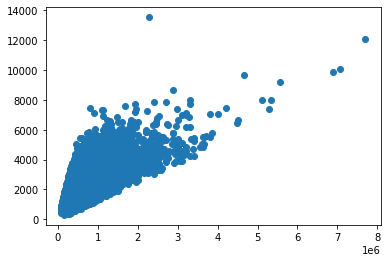

In [32]:
plt.scatter(df_houses.price, df_houses.sqft_living)

<AxesSubplot:>

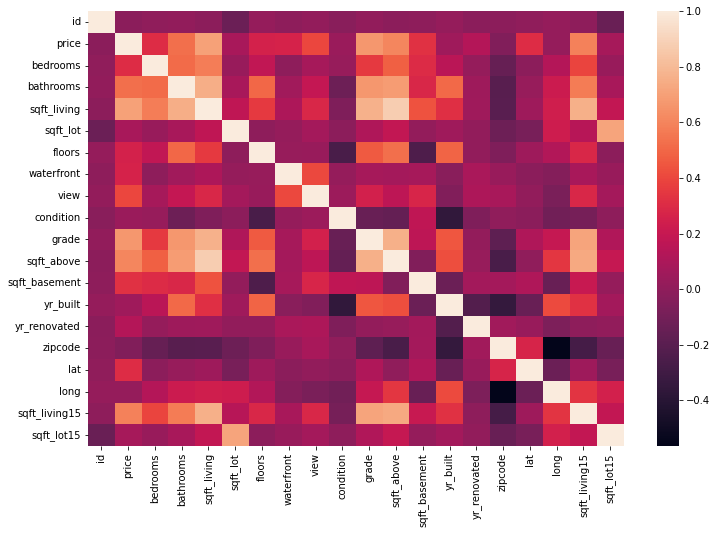

In [33]:
import seaborn as sns
plt.figure(figsize=(12,8))
sns.heatmap(df_houses.corr())

Analise do dataset de consumo de cerveja

In [51]:
df_cervejas = pd.read_csv('../csv/Consumo_cerveja.csv', sep=';')
df_cervejas

,data,temp_media,temp_min,temp_max,chuva,fds,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900
...,...,...,...,...,...,...,...
360,27/12/2015,24.00,21.1,28.2,13.6,1,32307
361,28/12/2015,22.64,21.1,26.7,0.0,0,26095
362,29/12/2015,21.68,20.3,24.1,10.3,0,22309
363,30/12/2015,21.38,19.3,22.4,6.3,0,20467


In [35]:
#Qual o Tamanho ?
df_cervejas.size

2555

In [36]:
#Existem dados faltando ? 
df_cervejas.isna().sum()

data          0
temp_media    0
temp_min      0
temp_max      0
chuva         0
fds           0
consumo       0
dtype: int64

/home/leo/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


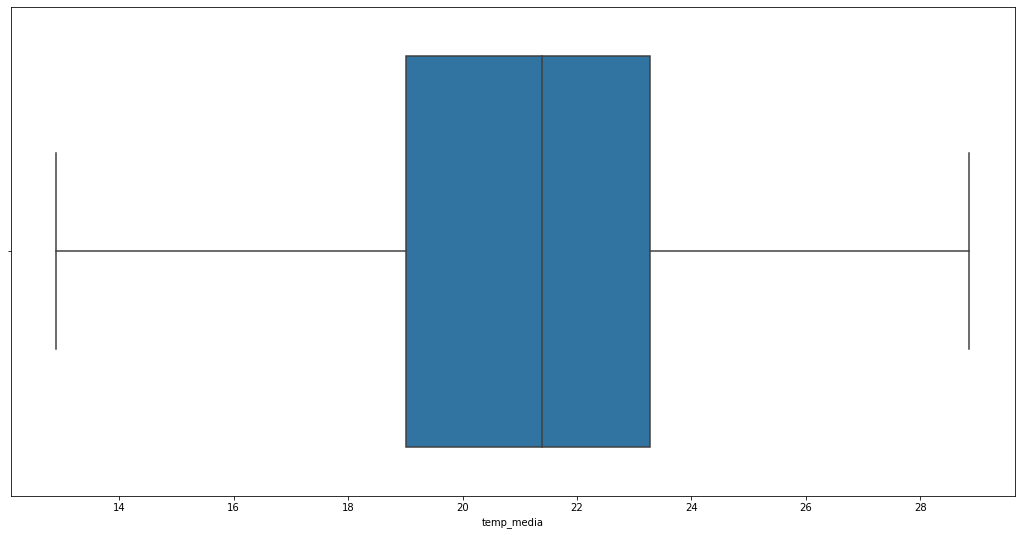

/home/leo/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


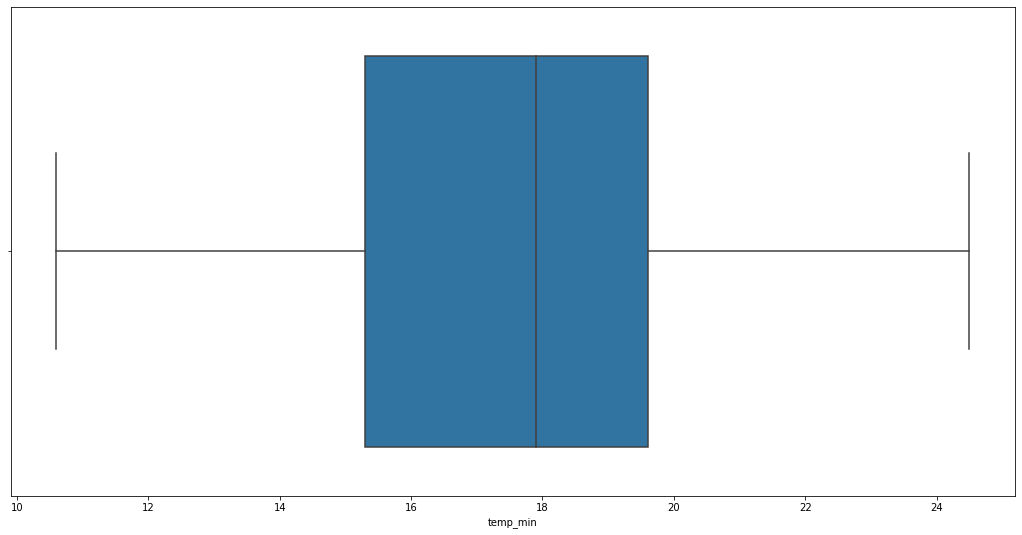

/home/leo/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


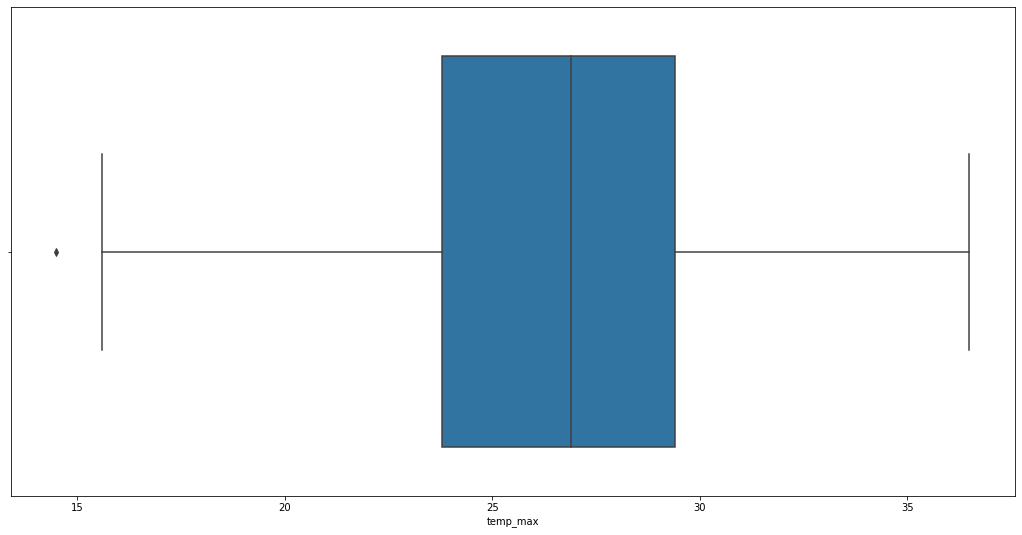

/home/leo/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


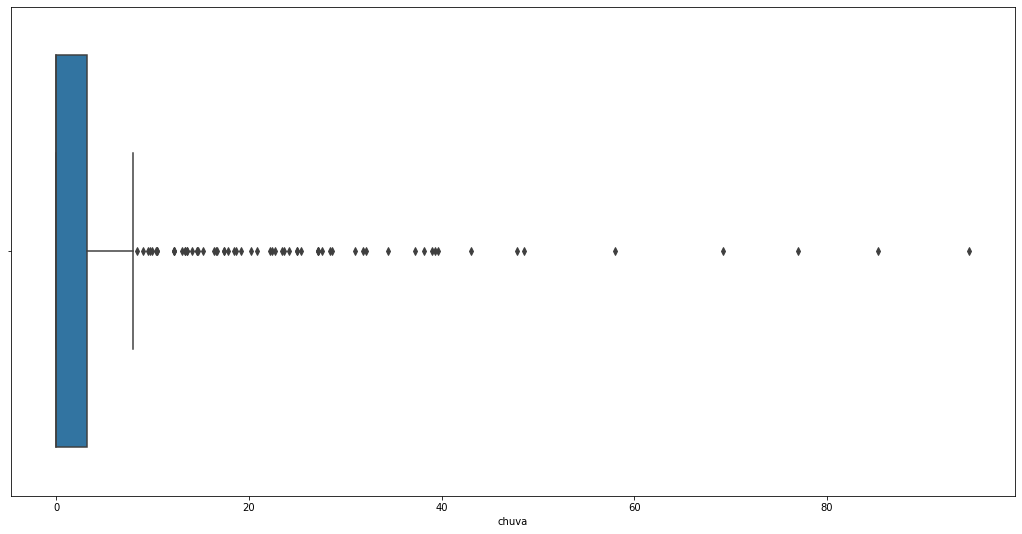

/home/leo/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


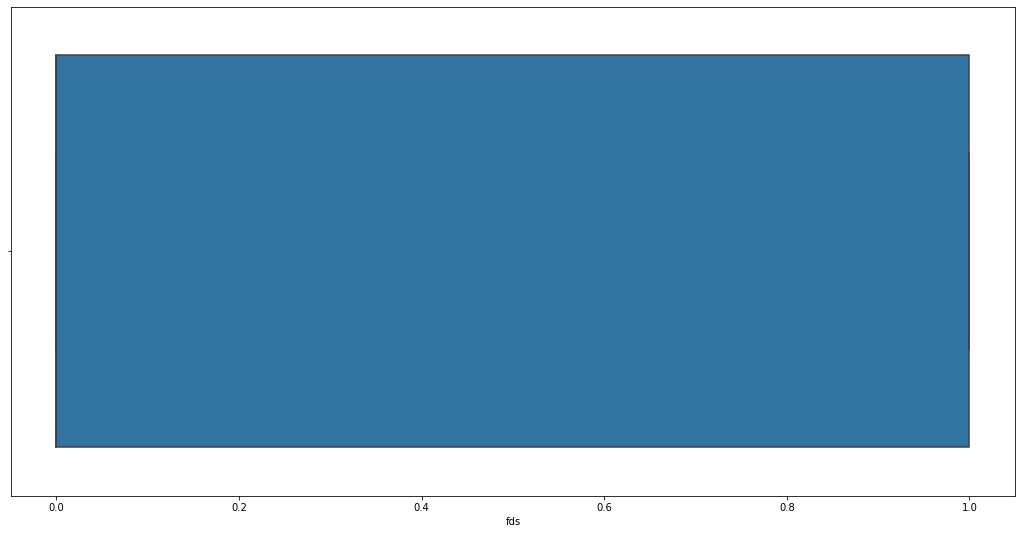

/home/leo/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


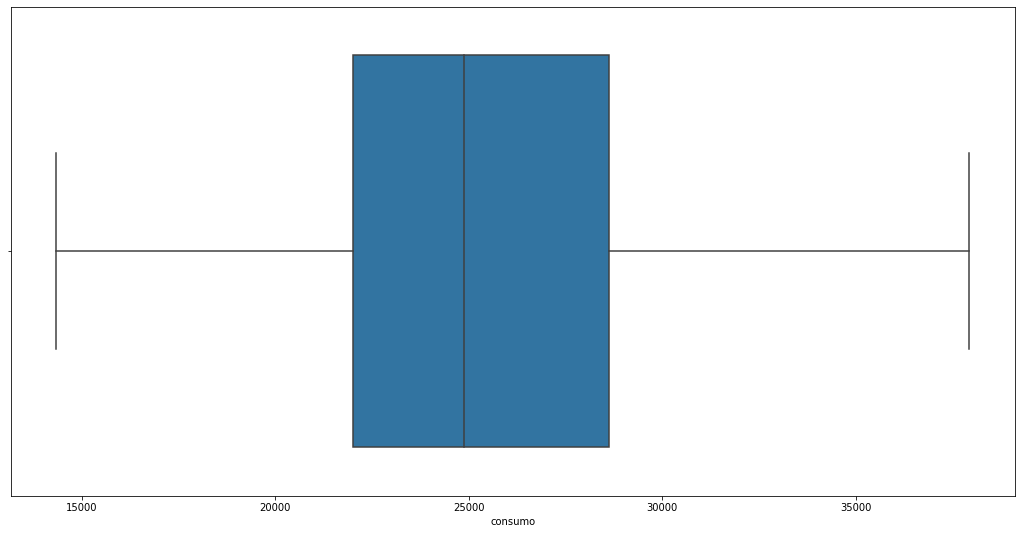

In [37]:
#Existem outliers ?, Se sim remova-os

for column in df_cervejas.columns[1:]:
    plt.figure(figsize=(18,9))
    sns.boxplot(df_cervejas[column])
    plt.show()

In [40]:
#Removendo outliers
coluna = 'chuva'
q1 = df_cervejas[coluna].quantile(.25)
q3 = df_cervejas[coluna].quantile(.75)
q2 = q3-q1

limite_inferior = q1 - (q2*1.5)
limite_superior = q3 + (q2*1.5)

selecao = (df_cervejas[coluna] >= limite_inferior) & (df_cervejas[coluna] <= limite_superior)

print(df_cervejas.shape)
print(df_cervejas[selecao].shape)

(365, 7)
(301, 7)


(array([238.,  12.,  17.,   6.,   9.,   6.,   3.,   1.,   4.,   5.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <BarContainer object of 10 artists>)

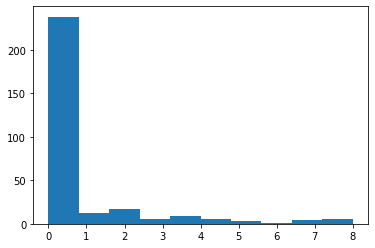

In [42]:
plt.hist(df_cervejas[selecao].chuva)

In [43]:
# Media de consumo de cerveja
df_cervejas['consumo'].mean()

25401.36712328767

In [46]:
# Media de consumo em dias de chuva
dias_de_chuva = (df_cervejas['chuva'] != 0)
df_cervejas[dias_de_chuva].consumo.mean()

24617.768707482992

In [55]:
# Consumo medio quando esta frio
dias_frios = (df_cervejas['temp_max'] <= 16)
df_cervejas[dias_frios].consumo.mean()

21554.0

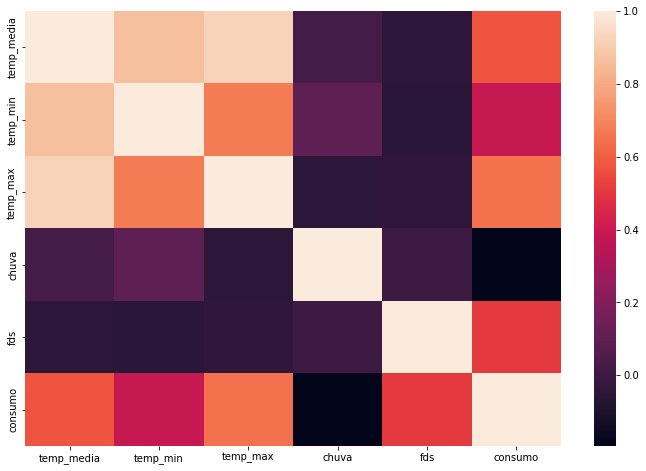

In [57]:
# Quais colunas tem correlação
plt.figure(figsize=(12,8))
sns.heatmap(df_cervejas.corr())
plt.show()

In [ ]:
# Quais colunas são fortes preditoras para o consumo de cerveja ?
# R : Temperatura maxima e média.